In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv
/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv
/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2016 (v3).csv
/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2018 (v5).csv
/kaggle/input/building-permit-applications-data/Building_Permits.csv
/kaggle/input/building-permit-applications-data/DataDictionaryBuildingPermit.xlsx


In [2]:
#Reading required building permits data and nfl data

nfl_data = pd.read_csv('/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv')
building_permits = pd.read_csv('/kaggle/input/building-permit-applications-data/Building_Permits.csv')
building_permits

/tmp/ipykernel_20/1441884491.py:3: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv('/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv')
/tmp/ipykernel_20/1441884491.py:4: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  building_permits = pd.read_csv('/kaggle/input/building-permit-applications-data/Building_Permits.csv')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [3]:
#Lets check some data to see what kind of anomalies are there
nfl_data.sample(5)
#AS the output seggests we can see there are lots on NaN feilds with missing data.


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
44615,2010-09-09,2010090900,4,1,1.0,07:58,8,3178.0,40.0,MIN,...,-2.581310,0.654148,0.345852,0.676560,0.323440,0.345852,-0.022412,0.063817,-0.086229,2010
89901,2011-09-11,2011091106,4,1,1.0,05:47,6,3047.0,0.0,DET,...,NaN,0.682166,0.317834,0.697927,0.302073,0.317834,-0.015761,NaN,NaN,2011
269228,2014-12-28,2014122805,3,1,1.0,09:52,10,3292.0,12.0,MIA,...,0.144662,0.547193,0.452807,0.585216,0.414784,0.547193,0.038023,0.032181,0.005841,2014
284548,2015-10-15,2015101500,6,2,NaN,14:12,15,2652.0,0.0,ATL,...,NaN,0.690245,0.309755,0.690245,0.309755,0.690245,0.000000,NaN,NaN,2015
182010,2013-09-08,2013090810,6,2,2.0,10:36,11,2436.0,39.0,ARI,...,NaN,0.412930,0.587070,0.433723,0.566277,0.587070,-0.020793,NaN,NaN,2013


In [4]:
building_permits.sample(5)
#same case for the other data set as well


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
115694,M666407,8,otc alterations permit,02/25/2016,1248,001,1701,NaN,Haight,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.769263227540804, -122.45092604970377)",141393193703
18086,201307101456,8,otc alterations permit,07/10/2013,3709,019,50,NaN,Fremont,St,...,1.0,constr type 1,1.0,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,"(37.79057144260876, -122.39756503160109)",1310548164581
153076,201703282497,8,otc alterations permit,03/28/2017,5802,010,46,NaN,Genebern,Wy,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Bernal Heights,94112.0,"(37.734374517907405, -122.4248477005816)",1457567188526
127932,M699367,8,otc alterations permit,06/21/2016,0927,036,2225,NaN,Bay,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Marina,94123.0,"(37.80154539902214, -122.44368164016677)",142740384406
116015,M644007,8,otc alterations permit,12/07/2015,1901,045,3655,NaN,Lawton,St,...,NaN,NaN,NaN,NaN,NaN,4.0,Sunset/Parkside,94122.0,"(37.75666645256095, -122.5022279879086)",1414286390200


In [5]:
#lets clean the building_permits datast first
#finding number of missing data peer column
missing_values_count = building_permits.isnull().sum()

print(missing_values_count)

#total missing values
missing_values_count.sum()



Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

2245941

In [6]:
#lets try removing the nan's directly and check whats left

building_permits.dropna()

#since each row had at least one NaN value all the data was removed. so this wont work. Trying alternatives



,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [7]:
#lets try removing columns with NaNs instead
columns_with_nan_dropped = building_permits.dropna(axis = 1)
columns_with_nan_dropped.head()

#here we can see there are data left. But still we removed much more data , which may be important data


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [8]:
#lets check how much data was lost
print(f"Original columns = {building_permits.shape[1]} ")
print(f"Dropped columns = {columns_with_nan_dropped.shape[1]} ")

#At this point even if we lost some data , our dataset in hand have no NaN's

Original columns = 43 
Dropped columns = 12 


In [9]:
#Another option than dropping the columns could be adding the missing values automatically
#lets take a small subset and try that

subset_data = building_permits.loc[:,'Street Number Suffix':'Issued Date']
subset_data.head()

,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date
0,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015
1,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017
2,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN
3,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017
4,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017


In [10]:
#using pandas to fill Na's with 0(This could be an alternative)
subset_data.fillna(0)


,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date
0,0,Ellis,St,0.0,0,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015
1,0,Geary,St,0.0,0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017
2,0,Pacific,Av,0.0,0,installation of separating wall,withdrawn,09/26/2017,05/27/2016,0
3,0,Pacific,Av,0.0,0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017
4,0,Market,St,0.0,0,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017
...,...,...,...,...,...,...,...,...,...,...
198895,0,Montgomery,St,0.0,0,street space,issued,12/05/2017,12/05/2017,12/05/2017
198896,0,Bush,St,0.0,0,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017
198897,0,Indiana,St,0.0,0,street space,issued,12/06/2017,12/06/2017,12/06/2017
198898,0,Sutter,St,0.0,0,street space permit,issued,12/06/2017,12/06/2017,12/06/2017


In [11]:
#or we can try filling Na's with the value that comes right after it in the same column
#then replace remaining na,s with 0
subset_data.fillna(method = 'bfill',axis = 0).fillna(0)

#This method is useful if there is a logical order in the data that makes some sense


,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date
0,A,Ellis,St,0.0,A,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015
1,A,Geary,St,0.0,A,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017
2,A,Pacific,Av,0.0,A,installation of separating wall,withdrawn,09/26/2017,05/27/2016,07/18/2017
3,A,Pacific,Av,0.0,A,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017
4,A,Market,St,0.0,A,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017
...,...,...,...,...,...,...,...,...,...,...
198895,0,Montgomery,St,0.0,0,street space,issued,12/05/2017,12/05/2017,12/05/2017
198896,0,Bush,St,0.0,0,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017
198897,0,Indiana,St,0.0,0,street space,issued,12/06/2017,12/06/2017,12/06/2017
198898,0,Sutter,St,0.0,0,street space permit,issued,12/06/2017,12/06/2017,12/06/2017


In [12]:
#Scale and normalize Data

#step 1 : Setting the environment

#loading required modules
import numpy as np

#for minmax scaling
from mlxtend.preprocessing import minmax_scaling

#FOR transformation
from scipy import stats

#plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


#Reading required data: For this task we will use the kickstarter-projects data for 2018
data = pd.read_csv('/kaggle/input/kickstarter-projects/ks-projects-201801.csv')
data.head()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Original [1.11377524 0.31256771 0.82051214 0.58560754 0.10431873 0.62203583
 1.72629629 0.68036187 0.30535231 1.06070441]
Scaled [0.17641424 0.04935839 0.12990845 0.09265717 0.01633417 0.09843398
 0.27354811 0.10768335 0.04821417 0.16799825]


/tmp/ipykernel_20/519521757.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_data, ax =ax[0])
/tmp/ipykernel_20/519521757.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax =ax[1])


Text(0.5, 1.0, 'Scaled Data')

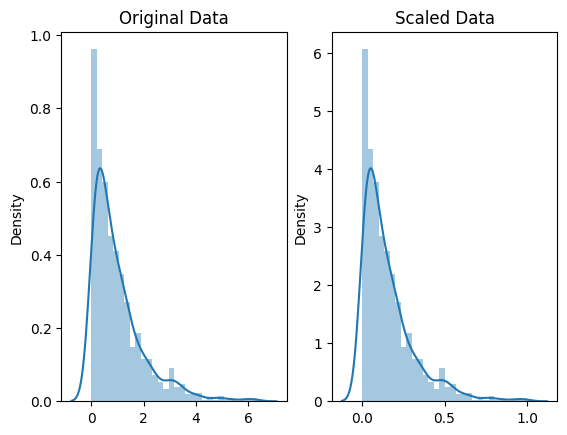

In [13]:
#Difference between scaling and normalization is that in scaling we are changing the range of the data
#but in normalization we are chaiging the shape of the distribution of the data

#Scaling 

#generating 1000 data points randonly drawn from an exponential distribution

sample_data = np.random.exponential(size=1000)
print(f'Original {sample_data[0:10]}')

#minmax scaling the data between 0-1
scaled_data = minmax_scaling(sample_data,columns = 0)

print(f'Scaled {scaled_data[0:10]}')

#plotting both data to compare
fig, ax = plt.subplots(1,2)
sns.distplot(sample_data, ax =ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax =ax[1])
ax[1].set_title('Scaled Data')


/tmp/ipykernel_20/735429452.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_data, ax =ax[0])
/tmp/ipykernel_20/735429452.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax =ax[1])


Text(0.5, 1.0, 'Normalized Data')

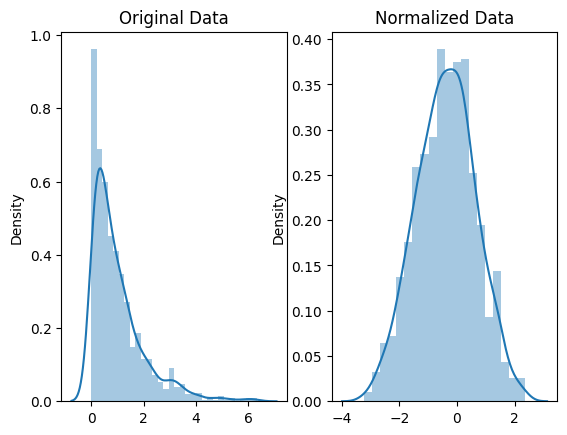

In [14]:
#NOrmalization: The point of normalization is to change the observations so that they can be described as a normal distribution.
#Normal distribution is also called Gaussian Distribution

#here we will use box-cox transformation for normalization

normalized_data = stats.boxcox(sample_data)

#plotting normalized data

fig, ax = plt.subplots(1,2)
sns.distplot(sample_data, ax =ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_data[0], ax =ax[1])
ax[1].set_title('Normalized Data')

/opt/conda/lib/python3.10/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
/tmp/ipykernel_20/2663029624.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(usd_goal, ax =ax[0])
/tmp/ipykernel_20/2663029624.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-le

Text(0.5, 1.0, 'Scaled Data')

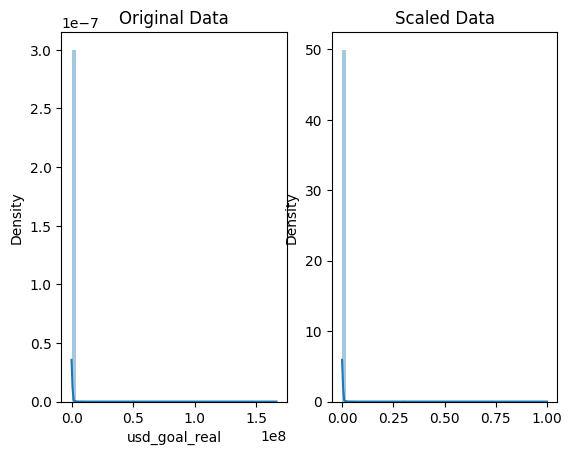

In [15]:
#using the data kickstart to perform scaling
usd_goal =  data.usd_goal_real

#scaling from 0-1
scaled_data = minmax_scaling(usd_goal,columns = [0])

#plotting scaled data

fig, ax = plt.subplots(1,2)
sns.distplot(usd_goal, ax =ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax =ax[1])
ax[1].set_title('Scaled Data')

/tmp/ipykernel_20/3072468288.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_pledges, ax =ax[0])
/tmp/ipykernel_20/3072468288.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_pledges, ax =ax[1])


Text(0.5, 1.0, 'Normalized Data')

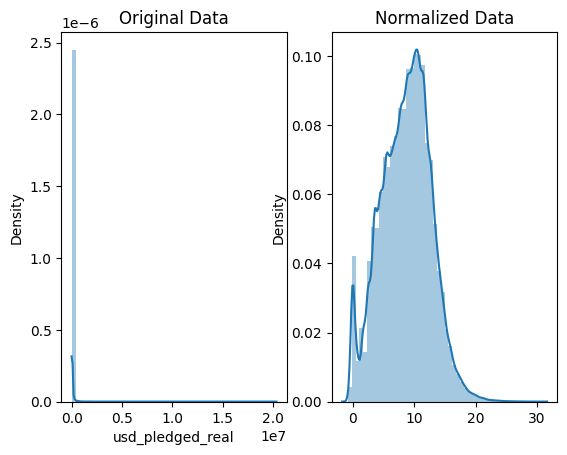

In [16]:
#Normalization

#getting positive indices for box cox
positive_pledges_index = data.usd_pledged_real >0

#getting positive pledges
positive_pledges = data.usd_pledged_real[positive_pledges_index]

#normalizing pledges
normalized_pledges = stats.boxcox(positive_pledges)[0]

#plotting normalized data

fig, ax = plt.subplots(1,2)
sns.distplot(positive_pledges, ax =ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_pledges, ax =ax[1])
ax[1].set_title('Normalized Data')